# Generic Feature Reduction - Diabetes Patients

In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_columns', None)

In [2]:
# Read in the integrated Data Files 
df_Patient = pd.read_excel("C:/Users/josep/documents/datasets/AIHS_Patient.xlsx",nrows=10000)
df_Patient.loc[0:2, :]

,Index,Year,Patient Ordinal,Birth Date,Age,Decade,Gender,Race,Race Category,Diabetes,Diabetic Metabolic Syndrome,ADA Risk,Family Member with Diabetes,Physical Activity Minutes,Activity Level,Activity Quartile,High Blood Pressure Response,High Blood Pressure,Height in Inches,Height in Centimeters,Patients weight in lbs,Weight in KG,BMI,BMII,BMI Class,ADA Family Risk,ADA Age Risk,ADA Gender Risk,ADA BMI Risk,ADA Hypertension Risk,Total Calculated ADA pre-Diabetes Risk,AIHS Age Risk,AIHS BMI Risk,Total Calculated AIHS Risk Stratifcation,Simulated BMI Class,Simulated Activity Class,Patient Cohort,Number of Claims,Emergency Department Visit count,Inpatient Admission count,Institutional Claim Count,Professional Claim Count,Pharmacy Claim Count,Dental Claim Count,Total Paid Amount,Per Patient Per Year Amount,Per Patient Per Month Amount,Per Patient Per Year Utilization,Per Patient Per Month Utilization,Alternative ED Visit Claim Count,Alternative IP Admission Claim Count,Number of Endocrine Nutritional Metabolic Immunity Disorders Claims,Number of Congenital Anomalies Claims,Number of Genitourinary System Claims,Number of Symptoms Signs Ill Defined Conditions Claims,Number of Circulatory System Claims,Number of Respiratory System Claims,Number of Diseases of the Blood Claims,Number of Infectious and parasitic diseases Claims,Number of Mental Illness Claims,Number of Neoplasms Claims,Number of Diseases of the Nervous System Claims,Number of Diseases of the Digestive System Claims,Number of Diseases of the Musculoskeletal System Claims,Number of Injury and Poisoning Claims,Number of Residual Codes Unclassified Claims,Number of Complications of Pregnancy Childbirth Claims,Number of Perinatal Period Claims,Number of Diseases of the Skin Claims,Patient Ordinal.1,Weight Current,Weight Period 1,Weight Period 2,Weight Period 3,Weight Period 4,Weight Period 5,HBA1c Period 5,BP Diastolic Current,BP Diastolic Period 1,BP Diastolic Period 2,BP Diastolic Period 3,BP Diastolic Period 4,BP Diastolic Period 5,BP Systolic Current,BP Systolic Period 1,BP Systolic Period 2,BP Systolic Period 3,BP Systolic Period 4,BP Systolic Period 5,LDL Current,LDL Period 1,LDL Period 2,LDL Period 3,LDL Period 4,LDL Period 5,HDL Current,HDL Period 1,HDL Period 2,HDL Period 3,HDL Period 4,HDL Period 5,BRFSS Index,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,"MEDCOST Was there a time during the past 12 months when you needed to see a doctor, but could not because of the cost? ? 1=Yes 2=No 7=DK/Not sure 9=Refused",CHECKUP1,CHECKUP1 About how long has it been since you last visited a doctor for a routine checkup? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,BPHIGH4,"BPHIGH4 Have you ever been told by a doctor, nurse, or other health professional that you have high blood pressure?? 1=Yes 2=No 7=DK/Not sure 9=Refused",BPMEDS,BPMEDS Are you currently taking medicine for your high blood pressure? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,BLOODCHO,BLOODCHO Blood cholesterol is a fatty substance found in the blood. Have you ever had your blood cholesterol checked? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,CHOLCHK,CHOLCHK when was cholesterol checked?,TOLDHI2,TOLDHI2 Ever told blood cholesterol is high? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,CVDINFR4,"CVDINFR4 Ever told you have heart attack, also called a myocardial infarction ? 1=Yes 2=No 7=DK/Not sure 9=Refused",CVDCRHD4,CVDCRHD4 Ever told you have angina or coronary heart disease ? 1=Yes 2=No 7=DK/Not sure 9=Refused,CVDSTRK3,CVDSTRK3 Ever told you have Stroke ? 1=Yes 2=No 7=DK/Not sure 9=Refused,ASTHMA3,ASTHMA3 Ever told you have Asthma ? 1=Yes 2=No 7=DK/Not sure 9=Refused,ASTHNOW,ASTHNOW Do you still have asthma? 1=Yes 2=No 7=DK/Not sure 9=Refused,CHCSCNCR,CHCSCNCR (Ever told) you have Skin Cancer? 1=Yes 2=No 7=DK/Not sure 9=Ref

In [3]:
df_Patient.shape


(10000, 491)

In [11]:
# Random Forest 81% Accuracy 
df_Patient_Demographic = df_Patient[['Age','High Blood Pressure','INCOME2','Race','BMI Class','Gender','CVDINFR4','Activity Level','Physical Activity Minutes','Activity Quartile','Diabetes']]
df_Patient_Demographic.head()

,Age,High Blood Pressure,INCOME2,Race,BMI Class,Gender,CVDINFR4,Activity Level,Physical Activity Minutes,Activity Quartile,Diabetes
0,49,1,3,1,Morbidly Obese,Male,2,0,294,2,0
1,73,0,1,1,Overweight,Male,2,0,168,2,0
2,49,0,99,1,Healthy Weight,Male,7,0,294,2,0
3,87,1,8,1,Overweight,Female,2,0,294,2,0
4,87,0,77,1,Healthy Weight,Male,2,0,294,2,0


In [ ]:
# Random Forest 83% Accuracy 
df_Patient_Demographic = df_Patient[[ 'Age','High Blood Pressure','Decade','Gender','Activity Level','Diabetes']]
df_Patient_Demographic.head()

In [ ]:
df_Patient_Demographic = df_Patient[[ 'Age', 'Decade', 'Gender','Activity Level','Diabetes']]
df_Patient_Demographic.head()

In [12]:
# One hot Encode all category variables
X = df_Patient_Demographic.drop(['Diabetes'], axis = 1)
Y = df_Patient_Demographic['Diabetes']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)


In [13]:
# forest Test 
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=1000).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    
    conf_matrix = confusion_matrix(Y_Test,predictionforest) 
    print(classification_report(Y_Test,predictionforest))
      
    
    
    fig, ax = plt.subplots(figsize=(3.5, 3.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    

4.03125
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2508
           1       0.33      0.13      0.19       492

    accuracy                           0.81      3000
   macro avg       0.59      0.54      0.54      3000
weighted avg       0.76      0.81      0.78      3000



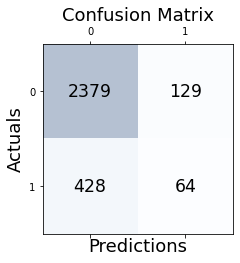

In [14]:
forest_test(X, Y)

In [ ]:
# Primary Compenent Analysis 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df_Patient_Demographic['Diabetes']], axis = 1)
PCA_df['Diabetes'] = LabelEncoder().fit_transform(PCA_df['Diabetes'])
PCA_df.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


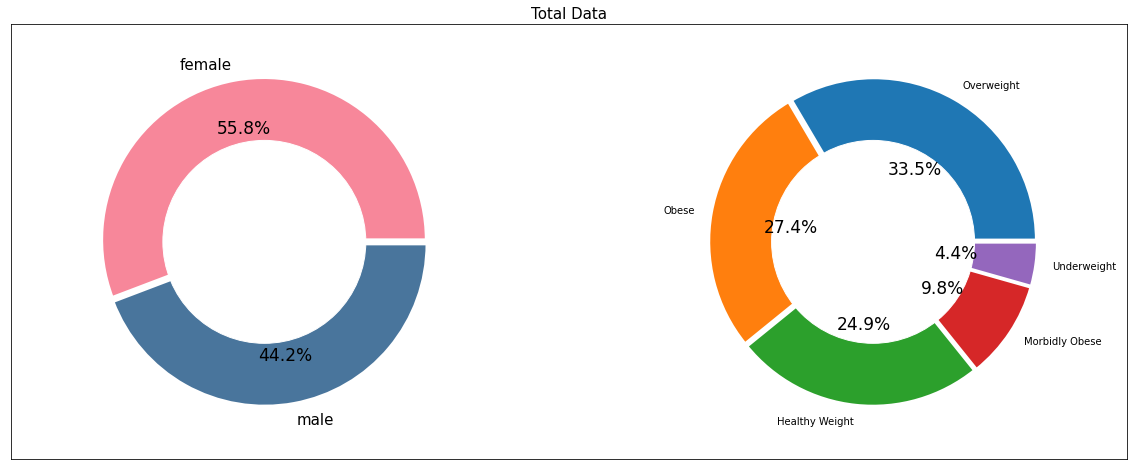

In [8]:
bmi = df_Patient['BMI Class'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(bmi))
bmi.head()

gender = df_Patient_Demographic['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(gender))
gender.head()

fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(gender))

wedges, texts, autotexts =  ax1.pie(gender,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(bmi))
wedges2, texts2, autotexts2 =  ax2.pie(bmi,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Overweight','Obese','Healthy Weight','Morbidly Obese','Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes



<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


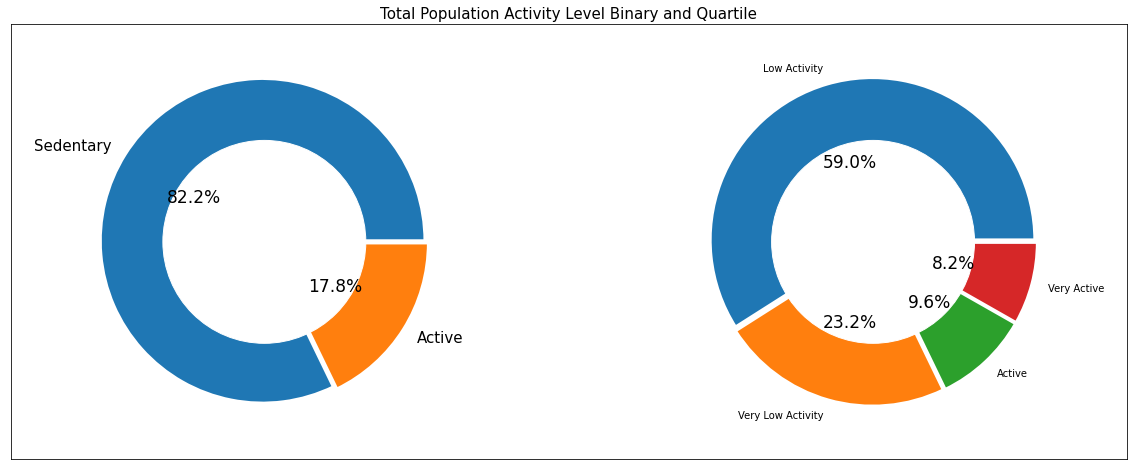

In [9]:
activity = df_Patient_Demographic['Activity Level'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(activity))
activity.head()

activityq = df_Patient_Demographic['Activity Quartile'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(activityq))
activityq.head()


fig = plt.figure(figsize=(20,8))
plt.title("Total Population Activity Level Binary and Quartile",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks



# Activity level pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(activity))
wedges1, texts1, autotexts1 =  ax1.pie(activity,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Sedentary','Active'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts1,size=17)
plt.setp(texts1,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(activityq))
wedges2, texts2, autotexts2 =  ax2.pie(activityq,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Low Activity','Very Low Activity','Active','Very Active'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes



In [ ]:
correlation_matrix = df_Patient_Demographic.corr()     #establish a correlation matrix for all fields
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_Patient_Demographic[top_correlation_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
cardiovasculardisease = df_Patient['CVDINFR4'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(cardiovasculardisease))
cardiovasculardisease.head(8)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


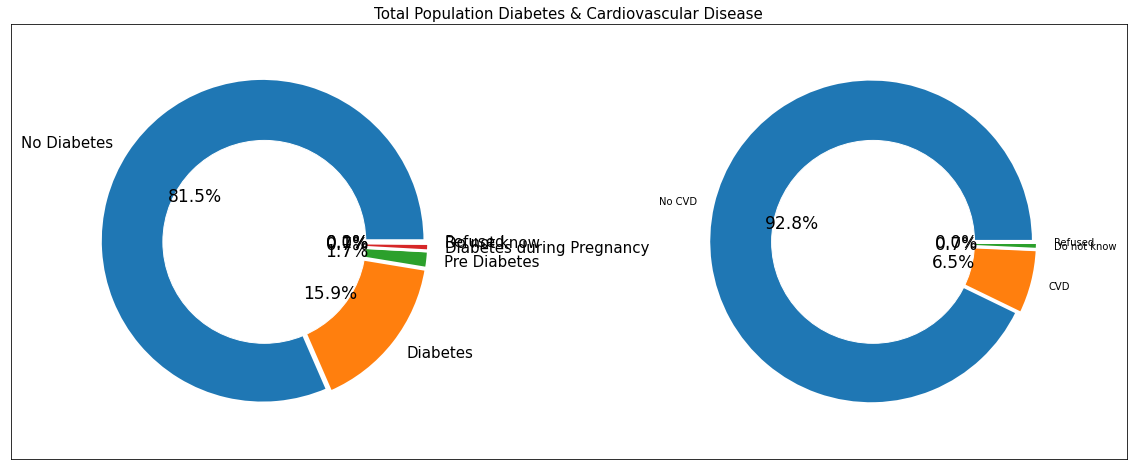

In [10]:
diabete = df_Patient['DIABETE3 '].value_counts() 
print(type(diabete))
diabete.head()

cardiovasculardisease = df_Patient['CVDINFR4'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(cardiovasculardisease))
cardiovasculardisease.head()


fig = plt.figure(figsize=(20,8))
plt.title("Total Population Diabetes & Cardiovascular Disease",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks



# Activity level pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(diabete))
wedges1, texts1, autotexts1 =  ax1.pie(diabete,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['No Diabetes','Diabetes','Pre Diabetes','Diabetes during Pregnancy','Do not know','Refused'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts1,size=17)
plt.setp(texts1,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(cardiovasculardisease))
wedges2, texts2, autotexts2 =  ax2.pie(cardiovasculardisease,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['No CVD','CVD','Do not know','Refused'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


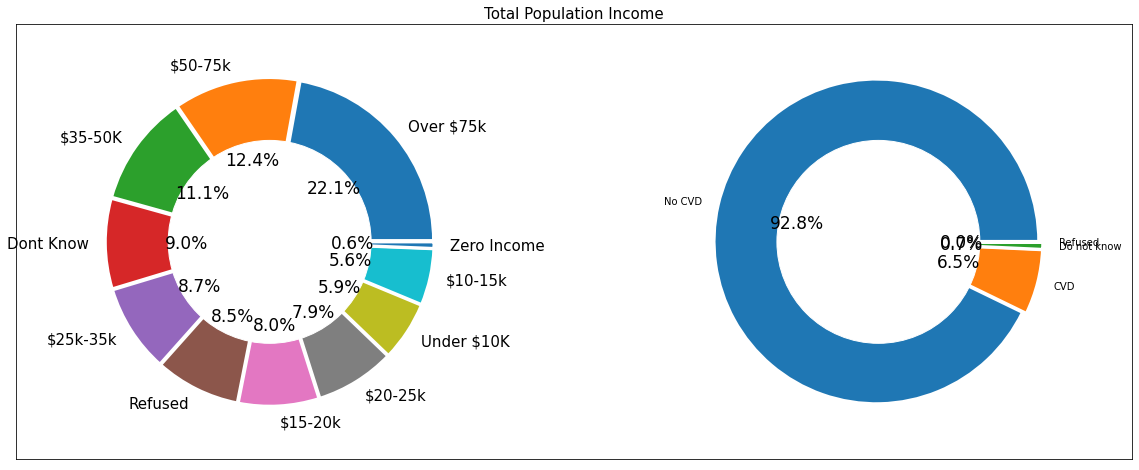

In [15]:
income = df_Patient['INCOME2'].value_counts() 
print(type(income))
diabete.head()

cardiovasculardisease = df_Patient['CVDINFR4'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(cardiovasculardisease))
cardiovasculardisease.head()


fig = plt.figure(figsize=(20,8))
plt.title("Total Population Income",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks



# Activity level pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(income))
wedges1, texts1, autotexts1 =  ax1.pie(income,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Over $75k','$50-75k','$35-50K','Dont Know','$25k-35k','Refused','$15-20k','$20-25k','Under $10K','$10-15k','Zero Income'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts1,size=17)
plt.setp(texts1,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(cardiovasculardisease))
wedges2, texts2, autotexts2 =  ax2.pie(cardiovasculardisease,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['No CVD','CVD','Do not know','Refused'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [ ]:
diabete = df_Patient['DIABETE3 '].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(diabete))
diabete.head(8)



In [ ]:
activityq = df_Patient_Demographic['Activity Quartile'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(activityq))
activityq.head()

In [ ]:
activity = df_Patient_Demographic['Activity Level'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(activity))
activity.head()


In [ ]:
bmi = df_Patient['BMI Class'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(bmi))
bmi.head()

In [ ]:
people = df_Patient_Demographic['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

In [ ]:
people = df_Patient_Demographic['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

In [ ]:
bmi = df_Patient['BMI Class'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(bmi))
bmi.head()

In [ ]:
#01=Less than $10,000  02=$10,000 to less than $15,000  03=$15,000 to less than $20,000  04=$20,000 to less than $25,000  05=$25,000 to less than $35,000  06=$35,000 to less than $50,000  07=$50,000 to $75,000  08=Over $75,000  77=DK/NS  99=Refused

income = df_Patient['INCOME2'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(income))
income.head(20)


In [ ]:
# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(bmi))
wedges2, texts2, autotexts2 =  ax2.pie(bmi,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Morbidly Obese','Obese','Overweight','Healthy Weight','Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [ ]:
# Primary Compenent Analysis 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

In [ ]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Diabetes'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['Diabetes'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Diabetes', 'Non Diabetes'])
plt.grid()

In [ ]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [ ]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

In [ ]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

forest_test(X_ica, Y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

In [ ]:
forest_test(X_lda, Y)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=3)
X_lle = embedding.fit_transform(X)
forest_test(X_lle, Y)